<a href="https://colab.research.google.com/github/wlans01/2021_cphys2/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST
- 하나의 히든 레이어를 도입한다.
- input layer는 28*28개의 노드
- hidden layer의 노드의 수는 자유롭게 설정해도 좋다.
- output은 10개(0~9)로 설정한다.
###test data를 예측하여 정확도를 최대가 되도록 학습하여라.
- 제출 시 test data의 정확도를 출력하여 제출하세요.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


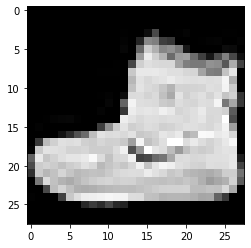

In [ ]:
plt.imshow(training_data.data[0], cmap='gray')

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
test_Accuracy=[]
test_Loss=[]
train_Loss=[]

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    TRAIN_LOSS=0
    for batch, (X, y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            TRAIN_LOSS+=loss
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    TRAIN_LOSS = TRAIN_LOSS/10
    train_Loss.append(TRAIN_LOSS)
    

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    test_Accuracy.append(100*correct)
    test_Loss.append(test_loss)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 300
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.308817  [    0/60000]
loss: 2.297713  [ 6400/60000]
loss: 2.273384  [12800/60000]
loss: 2.249635  [19200/60000]
loss: 2.262573  [25600/60000]
loss: 2.220795  [32000/60000]
loss: 2.232179  [38400/60000]
loss: 2.210063  [44800/60000]
loss: 2.203365  [51200/60000]
loss: 2.158302  [57600/60000]
Test Error: 
 Accuracy: 38.7%, Avg loss: 2.162859 

Epoch 2
-------------------------------
loss: 2.177520  [    0/60000]
loss: 2.175206  [ 6400/60000]
loss: 2.115340  [12800/60000]
loss: 2.114955  [19200/60000]
loss: 2.093823  [25600/60000]
loss: 2.026791  [32000/60000]
loss: 2.055140  [38400/60000]
loss: 1.993345  [44800/60000]
loss: 1.997407  [51200/60000]
loss: 1.910254  [57600/60000]
Test Error: 
 Accuracy: 52.1%, Avg loss: 1.920603 

Epoch 3
-------------------------------
loss: 1.952095  [    0/60000]
loss: 1.935585  [ 6400/60000]
loss: 1.821450  [12800/60000]
loss: 1.841165  [19200/60000]
loss: 1.750466  [25600/60000]
loss: 1.696006  [32000/600

In [ ]:
Epoch=[i for i in range(len(test_Loss))]

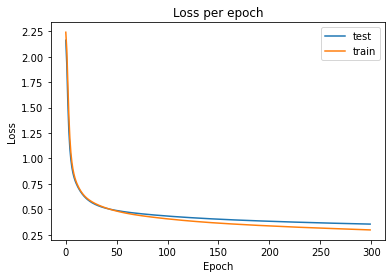

In [ ]:
plt.plot(Epoch,test_Loss ,label="test")
plt.plot(Epoch,train_Loss,label="train")
plt.title("Loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

Text(0, 0.5, 'Accuracy [%]')

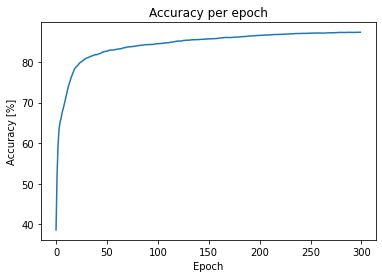

In [ ]:
plt.plot(Epoch,test_Accuracy)
plt.title("Accuracy per epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy [%]")

####Epoch를 300회로하여 훈련시켰을떄 
- 정확도: 87% 
- 오차값: 0.354

# 2. 아래의 글을 읽고 500자 이내로 감상문을 작성하세요.
https://webzine.kps.or.kr/?p=5_view&idx=16537

구글 딥마인드에서 만든 AI 알파고와 이세돌의 바둑경기에서 이세돌의 패배는 매우 충격적이었다. AI는 바둑처럼 전략을 구상하는것에 있어서 사람을 이길 수 없다는 생각이 완전히 :깨져버린것이다. 이후로 알파폴들라는 이릅으로 단백질 구조파악 인공지능으로 변신하여, 2018년 12월에 열린 CAsp에서 압도적인 성적으로 1위를 차지했다. 그 다음대회에서 데이빗 베이커 그룹이 만든 trRosetta가 알파폴드를 이겼지만 바로 다음 대회에서 알파폴드2에 큰 격차로 지고만다. 이윤을 추구하는 딥마인드에서 학문의 역사를 가지고 있는 베이커 그룹을 압도 적으로 이길 수 있는 이유는 무엇인가? 그들은 단백질 구성을 파악하기 위해 인공지능을 만들지 않았다. 기존의 인공지능이 그 기능을 알맞게 할것이라 판단했기 때문에 그일을 했을 뿐이다. 이것은 나에게도 매우 충격적이었다. 이제는 학문적인 부분만 중요하다고 생각하지않고 변화하는 시대에 AI의 흐름을 잘파악하여 기존의 학문적인 틀이아니라 새로운 방식에대해서도 고민을 해봐야겠다는 생각이 들었다.